In [1]:
import os

In [2]:
os.chdir('../../../Rat-Pilot/data/tag_directories/')

Find motifs for clustered peaks

In [3]:
%%time
%%bash
batchFindMotifsGenome.pl rn6 -size 500 -cpu 6 -p 15 \
-preparsedDir /gpfs/data01/bennerlab/home/sjroth/software/homer/data/genomes/rn6/preparsed -f cluster2.bed cluster3.bed cluster5.bed \
cluster8.bed cluster11.bed cluster14.bed

	120930 finished


findMotifsGenome.pl "cluster2.bed" rn6 "Motifs-cluster2.bed"  -size 500 -p 15 -preparsedDir /gpfs/data01/bennerlab/home/sjroth/software/homer/data/genomes/rn6/preparsed
findMotifsGenome.pl "cluster3.bed" rn6 "Motifs-cluster3.bed"  -size 500 -p 15 -preparsedDir /gpfs/data01/bennerlab/home/sjroth/software/homer/data/genomes/rn6/preparsed
findMotifsGenome.pl "cluster5.bed" rn6 "Motifs-cluster5.bed"  -size 500 -p 15 -preparsedDir /gpfs/data01/bennerlab/home/sjroth/software/homer/data/genomes/rn6/preparsed
findMotifsGenome.pl "cluster8.bed" rn6 "Motifs-cluster8.bed"  -size 500 -p 15 -preparsedDir /gpfs/data01/bennerlab/home/sjroth/software/homer/data/genomes/rn6/preparsed
findMotifsGenome.pl "cluster11.bed" rn6 "Motifs-cluster11.bed"  -size 500 -p 15 -preparsedDir /gpfs/data01/bennerlab/home/sjroth/software/homer/data/genomes/rn6/preparsed
findMotifsGenome.pl "cluster14.bed" rn6 "Motifs-cluster14.bed"  -size 500 -p 15 -preparsedDir /gpfs/data01/bennerlab/home/sjroth/software/homer/data/geno

CPU times: user 627 ms, sys: 203 ms, total: 829 ms
Wall time: 46min 27s


Combine motif enrichments for clustering

In [4]:
%%time
%%bash
combineGO.pl -f knownResults.txt -d Motifs-cluster*/ > cluster_motifs.known.txt

		Motifs-cluster11.bed/
		Motifs-cluster14.bed/
		Motifs-cluster2.bed/
		Motifs-cluster3.bed/
		Motifs-cluster5.bed/
		Motifs-cluster8.bed/


CPU times: user 754 µs, sys: 10 ms, total: 10.8 ms
Wall time: 36 ms


Heatmap of motif enrichments

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [6]:
motifs = pd.read_csv('cluster_motifs.known.txt',sep='\t',names=['Motif Name','Motif','Cluster 11','Cluster 14','Cluster 2','Cluster 3',
                                                                'Cluster 5','Cluster 8'],skiprows=1)
motifs = motifs.set_index('Motif Name')
del motifs['Motif']
motifs.head()

,Cluster 11,Cluster 14,Cluster 2,Cluster 3,Cluster 5,Cluster 8
Motif Name,,,,,,
RUNX2(Runt),-2.014000,-0.038020,-0.22930,-1.83200,-0.04375,-0.44440
"GFY-Staf(?,Zf)",-0.000007,-0.000008,-0.07497,-0.04704,-0.00000,-0.02084
ZNF341(Zf),-0.200900,-0.004585,-0.16630,-0.40170,-0.11230,-0.03508
BMYB(HTH),-0.368900,-2.592000,-1.68200,-3.32900,-3.14200,-2.09800
Rfx5(HTH),-0.046620,-0.631400,-0.80460,-0.01217,-4.40600,-0.11400


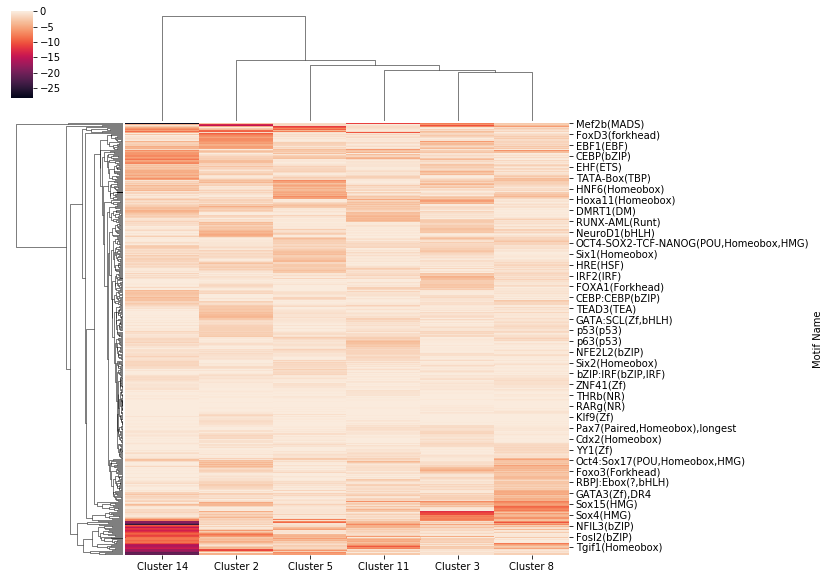

In [7]:
sns.clustermap(motifs)

In [8]:
motifs['min'] = motifs.min(axis=1)
motifs = motifs.nsmallest(25,'min')
del motifs['min']

In [9]:
sns.set(font_scale=0.75)

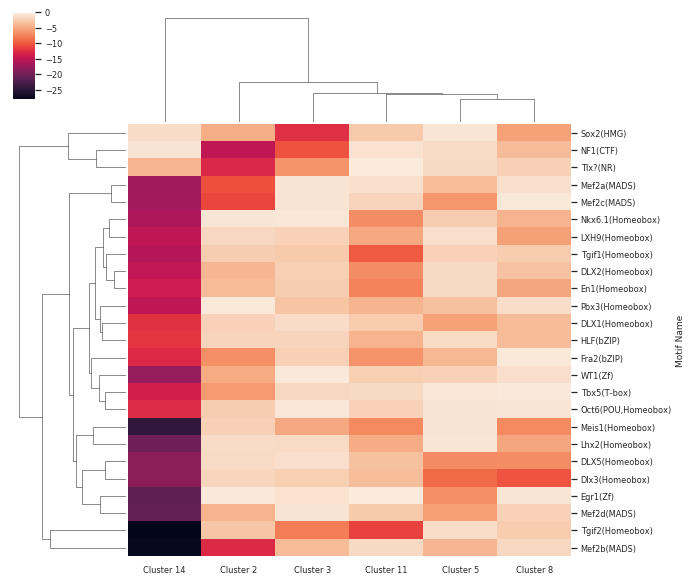

In [10]:
sns.clustermap(motifs)